In [7]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from cmap import Colormap

In [8]:
experiment = "Burgers"
factor = 1000
methods = ["deterministic","normal", "mixednormal", "mvnormal"]
index = ["RMSEValidation", "EnergyScoreValidation", "CRPSValidation", "CoverageValidation", "tau", "distributional_method"]
metrics = ["RMSEValidation", "EnergyScoreValidation", "CRPSValidation", "CoverageValidation"]

In [9]:
results = pd.DataFrame()

path = f"../results/noise_tuning/{experiment}/"
file_list = ([f for f in glob.iglob(path + "**", recursive = True) if os.path.isfile(f) and f.endswith(".csv")])
for file in file_list:
    if os.path.exists(file):
        results_df = pd.read_csv(file, index_col=0)
        results = pd.concat([results, results_df], axis = 1)

results.loc[metrics] = results.loc[metrics].astype("float32")
results.loc["tau"] = results.loc["tau"].astype("float32")
results = results.loc[index].transpose()

mean_results = results.groupby(["distributional_method", "tau"]).mean()

# Plot

In [10]:
colors = Colormap("colorbrewer:set2_5")
plt.style.use(['science', 'grid'])
legendsize = 20
titlesize = 22
ticksize = 18
labelsize = 20
lw = 2.5

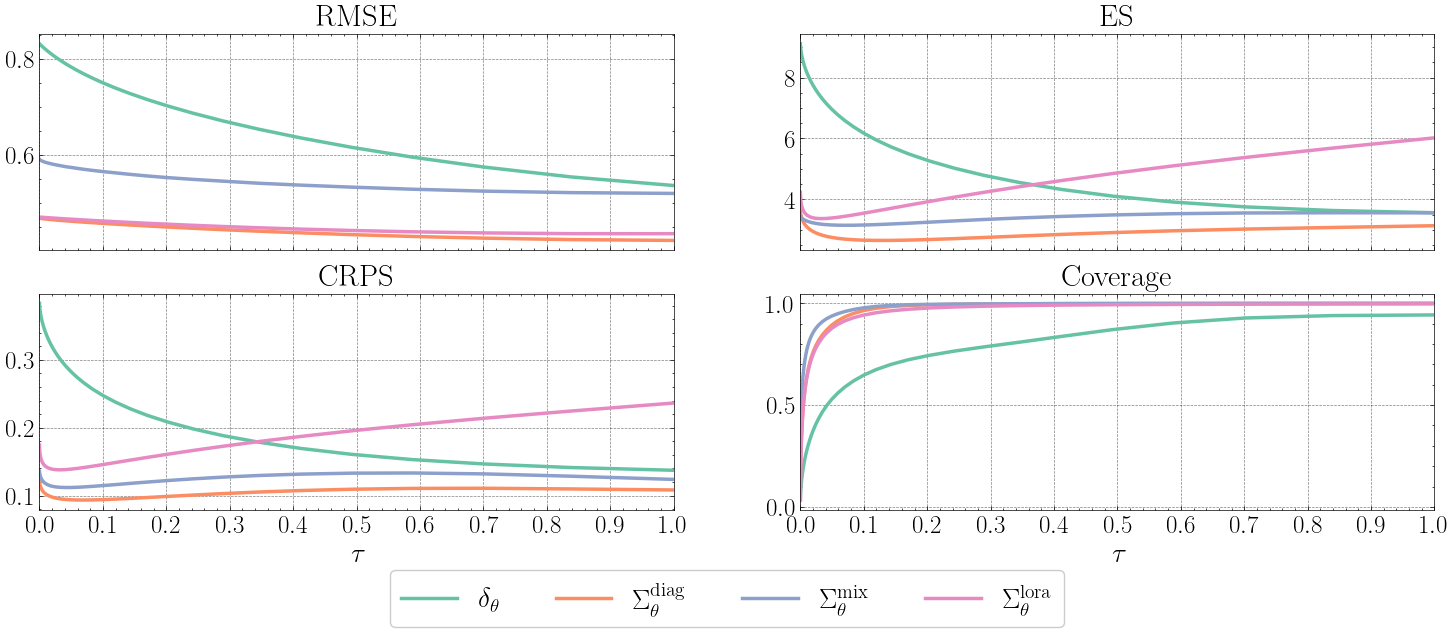

In [11]:
metrics = ["RMSEValidation", "EnergyScoreValidation", "CRPSValidation", "CoverageValidation"]
metric_names = ["RMSE", "ES", "CRPS", "Coverage"]
method_names = [r"$\delta_\theta$",r"$\Sigma_\theta^\mathrm{diag}$",r"$\Sigma_\theta^\mathrm{mix}$",r"$\Sigma_\theta^\mathrm{lora}$"]

fig, axs = plt.subplots(2,2, figsize = (18,7), sharex = True)
axs = axs.ravel()

for i,method in enumerate(methods):
    res = mean_results.loc[method]
    for m, metric in enumerate(metrics):
        if m <3:            
            axs[m].plot(res.index, res[metric]*factor, lw = lw, color = colors(i))
        else:
            axs[m].plot(res.index, res[metric], lw = lw, color = colors(i))
        axs[m].set_title(metric_names[m], size = titlesize)

    axs[i].xaxis.set_tick_params(labelsize=ticksize)
    axs[i].yaxis.set_tick_params(labelsize=ticksize)
    axs[i].set_xticks(np.arange(0,1.1,0.1))
    axs[i].set_xlim([0,1])

axs[2].set_xlabel(r"$\tau$", fontsize = labelsize)
axs[3].set_xlabel(r"$\tau$", fontsize = labelsize)

# Legend
fig.subplots_adjust(bottom=0.2)
fig.legend(labels = method_names, loc='lower center', ncol = 4, fontsize = legendsize)

plt.savefig(f"plots/{experiment}_noise_tuning.pdf", bbox_inches = "tight")